In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

2024-05-03 19:46:34.513958: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 19:46:34.515408: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 19:46:34.594526: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 19:46:35.019538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 19:46:36.145236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train /255
X_test = X_test / 255

In [13]:
nn = keras.models.Sequential([
    keras.layers.Input(shape = (28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [14]:
nn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
history = nn.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8344 - loss: 0.5781 - val_accuracy: 0.9483 - val_loss: 0.1728
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9552 - loss: 0.1537 - val_accuracy: 0.9633 - val_loss: 0.1230
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9674 - loss: 0.1074 - val_accuracy: 0.9664 - val_loss: 0.1106
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9744 - loss: 0.0862 - val_accuracy: 0.9684 - val_loss: 0.1051
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9799 - loss: 0.0687 - val_accuracy: 0.9694 - val_loss: 0.1088
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9809 - loss: 0.0573 - val_accuracy: 0.9667 - val_loss: 0.1078
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9671 - val_loss: 0.1211
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0415 - 

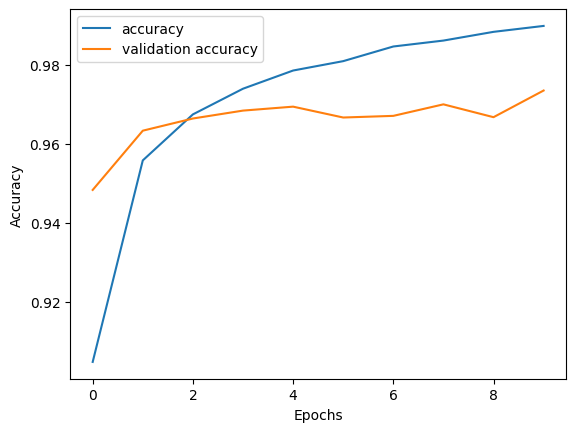

In [22]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy.png',dpi=144,bbox_inches='tight')
plt.show()

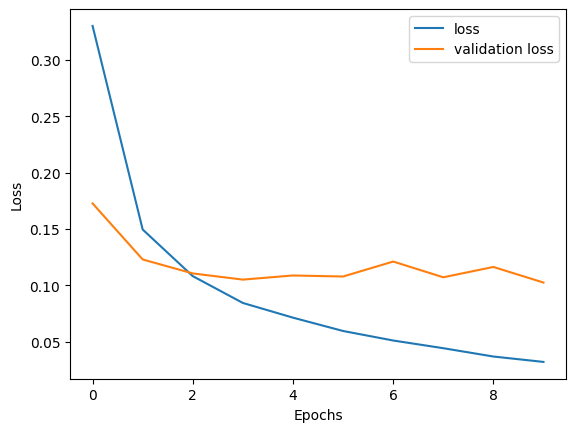

In [23]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss.png',dpi=144,bbox_inches='tight')
plt.show()

In [17]:
y_pred = nn.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
accuracy_score(y_test,y_pred)

0.9713

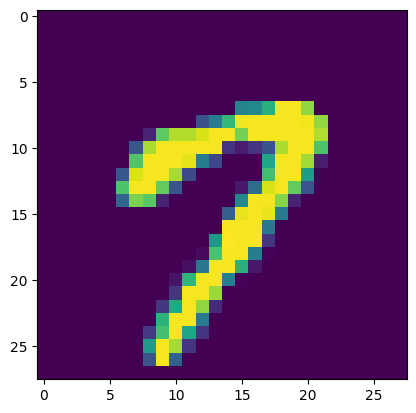

In [19]:
plt.imshow(X_train[15])
plt.show()

In [20]:
nn.predict(X_train[15].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([7])